In [1]:
"""
IMPORTS
"""
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import folium 
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
from vega_datasets import data as vds
from branca.element import Figure
import re
from datetime import datetime


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

from sklearn import metrics

### 1.- Obtención de los datos

In [3]:
df_modelado= pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_totales_balanced.csv',sep=',')
df_modelado

,Código Tipo Supuesto Urgente,Código Distrito Centro,Age_range_code,Nationality_code,Sex_code,year
0,30.0,11,0,2,1,2021
1,30.0,11,1,1,1,2021
2,40.0,5,6,1,1,2021
3,30.0,15,0,2,0,2021
4,40.0,10,6,1,1,2021
...,...,...,...,...,...,...
28394,50.0,6,2,1,1,2020
28395,50.0,6,4,1,1,2020
28396,50.0,8,1,1,0,2020
28397,50.0,11,3,1,1,2020


### 2.- Preparing TRAIN AND TEST DataFrames

In [4]:
X=df_modelado[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y=df_modelado['Código Tipo Supuesto Urgente']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)       # Genero los datos para entrenamiento y testeo
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(21299, 5)
(7100, 5)
(21299,)
(7100,)


In [6]:
train=pd.concat([X_train,y_train],axis=1)
train


,Código Distrito Centro,Age_range_code,Nationality_code,Sex_code,year,Código Tipo Supuesto Urgente
22694,7,3,0,0,2020,20.0
23890,8,1,1,1,2020,30.0
11081,12,4,1,1,2018,30.0
27550,6,4,0,1,2020,50.0
28213,6,2,1,0,2020,50.0
...,...,...,...,...,...,...
13123,12,6,1,1,2018,30.0
19648,15,2,1,1,2020,10.0
9845,2,6,1,1,2018,40.0
10799,13,6,1,0,2018,40.0


In [7]:
test=pd.concat([X_test,y_test],axis=1)
test

,Código Distrito Centro,Age_range_code,Nationality_code,Sex_code,year,Código Tipo Supuesto Urgente
14637,8,7,0,1,2020,40.0
15771,6,1,1,1,2020,50.0
16216,6,3,1,1,2020,50.0
14209,6,2,1,0,2020,30.0
19926,6,1,0,1,2020,10.0
...,...,...,...,...,...,...
23013,11,3,1,1,2020,30.0
10673,11,3,1,1,2018,40.0
20206,3,4,1,0,2020,10.0
18405,15,7,0,0,2020,10.0


In [8]:
train.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train_balanced.csv',header=True,index=False)
test.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test_balanced.csv',header=True,index=False)

### 3.- My first Model (DecisionTreeClassifier)

In [9]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train_balanced.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test_balanced.csv',sep=',')


In [10]:
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

Accuracy 0.6764788732394367
Precision 0.6764788732394367
Recall 0.6764788732394367
ROC 0.8756454650502559
F1 0.6764788732394367


<AxesSubplot:>

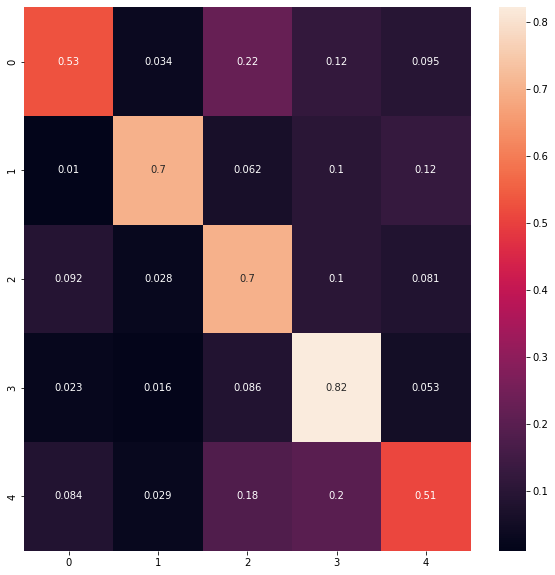

In [11]:
tree_reg = DecisionTreeClassifier(random_state=20)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)



print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred,average='micro'))
print('Recall', recall_score(y_test, y_pred,average='micro'))
print('ROC', roc_auc_score(y_test, tree_reg.predict_proba(X_test),multi_class='ovr'))
print('F1', f1_score(y_test, y_pred,average='micro'))

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)

In [12]:
def error_modelo(model):
    y_pred = model.predict(X_test)
    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='micro')
    recall_model=recall_score(y_test, y_pred,average='micro')
    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    f1_model=f1_score(y_test, y_pred,average='micro')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
    print('Accuracy', acc_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('ROC', roc_auc_model)
    print('F1', f1_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, annot=True)

Accuracy 0.6764788732394367
Precision 0.6764788732394367
Recall 0.6764788732394367
ROC 0.8756454650502559
F1 0.6764788732394367


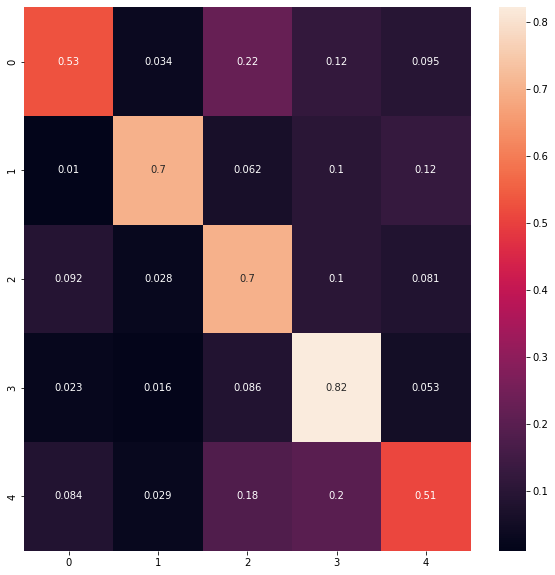

In [13]:
error_modelo(tree_reg)

In [14]:
import pickle 

In [ ]:
date=str(datetime.today().strftime('%y%m%d%H%M%S'))
name=input("Introduce el nombre del modelo a grabar (iniciales): ")
path=str('Javier/Repositorios/Machine_Learning/model/')
file=path+name+date+'.pickle'
pickle.dump(tree_reg,open(file,'wb'))

In [21]:

#pickle_file= file('train.pickle','w')
pickle.dump(tree_reg,open('train.pickle','wb'))

In [23]:
favorite_color = pickle.load( open( "train.pickle", "rb" ) )

In [24]:
favorite_color      #Vemos que se ha cargado el fichero

DecisionTreeClassifier(random_state=20)

In [56]:
from datetime import datetime

date=str(datetime.today().strftime('%y%m%d%H%M%S'))
model=str('TDC')
path=str('Javier/Repositorios/Machine_Learning/model')
file=path+model+date+'.pickle'
print(file)

Javier/Repositorios/Machine_Learning/modelTDC220831165608.pickle


### 4.- Exploring Graphics

### 5.- My first Model (linearRegression)

In [ ]:
df_urgencias_corregido['Código Tipo Supuesto Urgente']=df_urgencias_corregido['Código Tipo Supuesto Urgente'].mask(df_urgencias_corregido['Código Tipo Supuesto Urgente'] == ' ').fillna(0)
#   He añadido este codigo para ver si conseguia hacer que funcionará el modelo, al haber NaN en y

In [ ]:
X=df_urgencias_corregido_prueba[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y=df_urgencias_corregido_prueba['Código Tipo Supuesto Urgente']

In [ ]:

lin_reg = LinearRegression()   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lin_reg.fit(X_train, y_train)                           #   Entrenas/generas el modelo para determinar los coeficientes

print("Estos son los datos del test y del target:\n-----")
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)  

#    print("Estos son los datos del valor de y en x=0 y de las pendientes de cada gradiente de las variables:\n-----")
#    print(lin_reg.intercept_)
#    print(lin_reg.coef_)
coeff_df = pd.DataFrame(lin_reg.coef_,
                            X.columns,
                            columns=['Coefficient'])
print("-----\nEstos son las pendientes de cada gradiente visto en un Dataframe:")
print(coeff_df)

predictions = lin_reg.predict(X_test)                   #   Determino los resultados que deberían de dar con los valores guardados para
print("-----\nEl factor de correlacion de la regresión es: ",lin_reg.score(X_test, y_test))
print("-----\nErrores de las predicciones:")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("-----\nErrores de los tests:")
print('MAE:', metrics.mean_absolute_error(y_train, lin_reg.predict(X_train)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, lin_reg.predict(X_train)))
print('MSE:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))

print("Esta es la importancia de las variables:\n-----")
features = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['coefficient'])
print(features.head().sort_values('coefficient', ascending=False))

Se observa en los datos que, efectivamente, un **módelo de regresión lineal** no es válido para este tipo de predicciones, ya que el coeficiente de correlación de la regresión es 0.268.